In [2]:
# Mengimport library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import sklearn.model_selection as model_selection
from sklearn.metrics import (confusion_matrix, accuracy_score, 
                             f1_score, ConfusionMatrixDisplay,
                             classification_report)
from sklearn.calibration import LabelEncoder

In [3]:
# Import df
dataset = pd.read_excel('Kuesioner Pengaruh Drama_Movie pada Perilaku Sehari-hari (Jawaban) - Form Responses 1.xlsx')
print(dataset)
df = pd.DataFrame(dataset)
print(df)

              Frekuensi   Emosi Tercerminkan Menirukan Mindset  \
0              1-5 kali  Sering      Mungkin        Ya  Sering   
1              1-5 kali      Ya      Mungkin     Tidak   Tidak   
2              1-5 kali  Sering        Tidak        Ya      Ya   
3             6-10 kali      Ya      Mungkin        Ya   Tidak   
4              1-5 kali  Sering      Mungkin        Ya  Sering   
..                  ...     ...          ...       ...     ...   
108            1-5 kali  Sering           Ya        Ya   Tidak   
109  Lebih dari 10 Kali      Ya      Mungkin        Ya      Ya   
110            1-5 kali      Ya      Mungkin        Ya      Ya   
111            1-5 kali  Sering      Mungkin        Ya  Sering   
112            1-5 kali  Sering           Ya        Ya  Sering   

     Sumber Inspirasi  Tindakan positif   Cara komunikasi Perubahan  
0                   3                  4                3     Tidak  
1                   2                  4                2     Tidak

In [4]:
# Mengubah data kolom kategorik menjadi numerik
labelencoder = LabelEncoder()

# Untuk ketiga variabel di bawah, label numerik dimulai dari 0
df['Menirukan'] = labelencoder.fit_transform(df['Menirukan']) # Ya = 1, Tidak = 0

# Untuk keempat variabel di bawah, label numerik dimulai dari 1
label_columns = [
    'Frekuensi', # 1-5 kali = 1, 6-10 kali = 2, Lebih dari 10 kali = 3
    'Emosi', # Sering = 1, Tidak = 2, Ya = 3
    'Tercerminkan', # Mungkin = 1, Tidak = 2, Ya = 3
    'Mindset' # Sering = 1, Tidak = 2, Ya = 3
]
for column in label_columns:
    df[column] = labelencoder.fit_transform(df[column]) + 1

# Untuk variabel output, label numerik dimulai dari 0
df['Perubahan'] = labelencoder.fit_transform(df['Perubahan']) # Ya = 1, Tidak = 0

print(df)

     Frekuensi  Emosi  Tercerminkan  Menirukan  Mindset  Sumber Inspirasi  \
0            1      1             1          1        1                 3   
1            1      3             1          0        2                 2   
2            1      1             2          1        3                 4   
3            2      3             1          1        2                 3   
4            1      1             1          1        1                 5   
..         ...    ...           ...        ...      ...               ...   
108          1      1             3          1        2                 4   
109          3      3             1          1        3                 4   
110          1      3             1          1        3                 3   
111          1      1             1          1        1                 3   
112          1      1             3          1        1                 4   

     Tindakan positif   Cara komunikasi  Perubahan  
0                    4

In [5]:
# Pengecekan missing value
print("pengecekan missing value".center(75,"="))
print(df.isnull().sum())
print("===========================================================================")

==========================pengecekan missing value=========================
Frekuensi            0
Emosi                0
Tercerminkan         0
Menirukan            0
Mindset              0
Sumber Inspirasi     0
Tindakan positif     0
Cara komunikasi      0
Perubahan            0
dtype: int64


In [6]:
# Grouping yang dibagi menjadi dua
print("GROUPING VARIABEL".center(75,"="))
X=df.iloc[:,0:8].values
y=df.iloc[:,8].values
print("data variabel".center(75,"="))
print(X)
print("data kelas".center(75,"="))
print(y)
print("===========================================================================")

=============================GROUPING VARIABEL=============================
===============================data variabel===============================
[[1 1 1 1 1 3 4 3]
 [1 3 1 0 2 2 4 2]
 [1 1 2 1 3 4 3 4]
 [2 3 1 1 2 3 3 3]
 [1 1 1 1 1 5 4 4]
 [3 3 3 0 2 3 4 3]
 [1 3 1 0 1 3 4 4]
 [2 1 1 0 1 4 4 5]
 [3 1 3 1 3 3 4 3]
 [2 2 3 1 3 4 4 4]
 [2 2 2 0 3 3 3 3]
 [1 1 1 0 2 2 3 2]
 [1 3 1 0 1 2 4 2]
 [1 3 3 1 3 4 5 4]
 [2 1 1 0 1 4 5 4]
 [1 1 1 1 1 4 3 4]
 [2 1 1 0 3 4 2 5]
 [1 3 1 1 3 3 4 3]
 [2 3 1 1 1 2 4 4]
 [1 3 1 0 1 3 4 3]
 [2 3 1 1 3 4 3 2]
 [2 1 1 1 1 3 3 3]
 [1 3 1 1 3 4 4 3]
 [1 3 3 0 3 2 3 2]
 [2 1 1 1 1 4 4 3]
 [1 3 1 0 1 3 4 3]
 [2 1 3 0 1 3 3 3]
 [1 3 1 1 3 3 4 3]
 [1 3 1 0 3 3 4 4]
 [1 1 3 1 1 4 5 5]
 [1 3 3 1 3 3 3 3]
 [1 1 1 1 3 4 5 4]
 [1 2 1 0 3 3 3 3]
 [1 3 2 0 3 3 3 3]
 [1 3 3 1 1 4 4 2]
 [2 3 3 0 2 2 4 2]
 [3 3 3 1 3 5 5 5]
 [2 3 1 1 3 4 5 4]
 [1 2 1 0 1 3 3 2]
 [1 3 1 0 3 3 4 2]
 [2 3 1 0 3 3 5 4]
 [3 3 1 1 1 2 3 4]
 [2 1 2 0 3 4 4 4]
 [1 1 3 1 3 5 5 5]
 [1 3 3 1 3 

In [7]:
# Pembagian training dan testing
print("SPLITTING DATA 10-90".center(75,"="))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
print("instance variabel data training".center(75,"="))
print(X_train)
print("instance kelas data training".center(75,"="))
print(y_train)
print("instance variabel data testing".center(75,"="))
print(X_test)
print("instance kelas data testing".center(75,"="))
print(y_test)
print("===========================================================================")
print()

============================SPLITTING DATA 10-90===========================
======================instance variabel data training======================
[[2 3 3 0 3 4 2 5]
 [1 1 1 1 1 3 4 2]
 [2 3 1 1 1 2 4 4]
 [1 1 1 1 1 3 4 3]
 [1 1 1 0 3 3 4 4]
 [2 1 3 0 1 3 3 3]
 [1 3 1 0 3 3 4 4]
 [2 1 3 0 3 5 5 4]
 [1 1 1 0 1 3 4 4]
 [1 3 1 1 3 4 3 2]
 [1 3 1 0 1 2 4 2]
 [1 1 1 1 3 4 5 4]
 [2 1 3 1 3 4 5 2]
 [1 3 1 1 3 3 4 1]
 [1 1 3 1 3 4 5 4]
 [1 3 1 1 3 4 4 3]
 [1 3 3 1 3 3 3 3]
 [1 1 3 1 2 4 4 1]
 [1 1 3 1 1 4 4 4]
 [1 1 1 1 1 4 3 4]
 [1 3 3 1 3 3 3 3]
 [3 3 1 1 1 4 5 2]
 [2 2 3 1 3 4 4 4]
 [1 3 2 0 3 3 3 3]
 [1 1 3 1 1 2 3 4]
 [1 1 1 0 1 4 5 3]
 [1 3 1 0 3 3 4 4]
 [2 1 2 0 3 4 4 4]
 [3 3 3 0 2 3 4 3]
 [1 1 1 1 1 3 4 4]
 [1 1 1 1 1 3 3 3]
 [1 3 1 0 3 3 4 2]
 [2 3 3 0 2 2 4 2]
 [2 1 1 0 3 4 2 5]
 [2 3 1 1 1 4 5 5]
 [1 3 3 1 1 4 4 2]
 [1 1 1 1 1 2 4 4]
 [2 1 1 0 1 4 4 5]
 [1 1 3 1 3 5 5 5]
 [1 3 3 1 3 4 5 4]
 [1 1 1 0 1 2 3 2]
 [1 3 1 1 3 3 4 3]
 [1 3 1 0 1 3 4 3]
 [2 1 3 1 1 2 3 2]
 [1 1 1 1 1 

========================PEMODELAN DENGAN NAIVE BAYES=======================
instance prediksi naive bayes:
[0 1 0 0 0 0 1 1 1 0 0 1]
=====================CLASSIFICATION REPORT NAIVE BAYES=====================
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

Akurasi :  91.66666666666666 %
Sensitivity : 80.0
Specificity : 100.0
Precision : 0.8

Confusion matrix for Naive Bayes
 [[7 1]
 [0 4]]


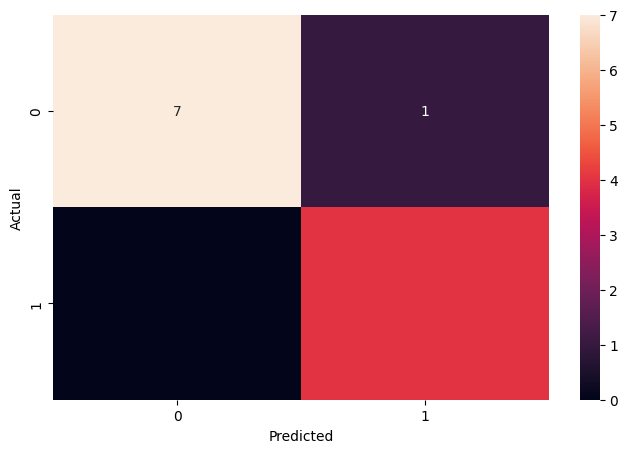

In [8]:
# Pemodelan naive bayes 
print("PEMODELAN DENGAN NAIVE BAYES".center(75,"="))
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)  #modelnya
Y_pred = gaussian.predict(X_test) #pengujian atau untuk memprediksi
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("instance prediksi naive bayes:")
print(Y_pred)
# Perhitungan confusion matrix
cm = confusion_matrix(y_test, Y_pred)
print('CLASSIFICATION REPORT NAIVE BAYES'.center(75,'='))

# Mendapat Akurasi
accuracy = accuracy_score(y_test, Y_pred)
# Mendapat Akurasi
precision = precision_score(y_test, Y_pred)
# Menampilkan recision    recall  f1-score   support
print(classification_report(y_test, Y_pred))
    
cm = confusion_matrix(y_test, Y_pred)
TN = cm[1][1] * 1.0
FN = cm[1][0] * 1.0
TP = cm[0][0] * 1.0
FP = cm[0][1] * 1.0
total = TN + FN + TP + FP
sens = TN / (TN + FP) * 100
spec = TP / (TP + FN) * 100
    
print('Akurasi : ', accuracy * 100, "%")
print('Sensitivity : ' + str(sens))
print('Specificity : ' + str(spec))
print('Precision : ' + str(precision))
print("============================================================")
print()

# Menampilkan Confusion Matrix
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)

print('Confusion matrix for Naive Bayes\n',cm)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

==========================DISTRIBUTION OF CLASSES==========================


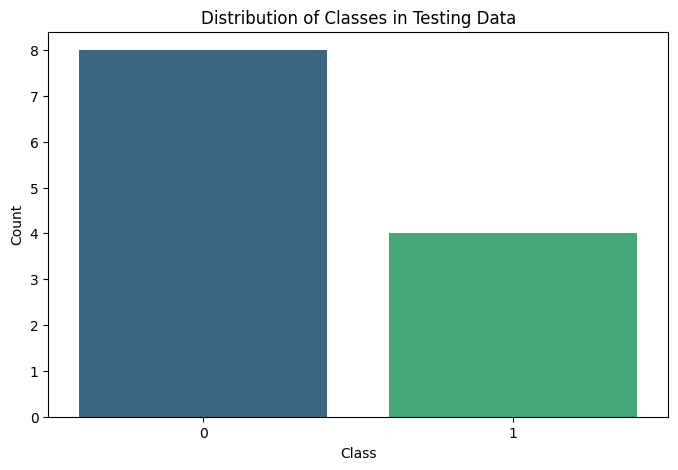

In [9]:
# Menampilkan Distribusi Kelas
print('DISTRIBUTION OF CLASSES'.center(75, '='))
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, palette='viridis')
plt.title('Distribution of Classes in Testing Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()